In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
proj_path = "/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals"

# 전처리 1개 test

In [ ]:
data0 = np.load(f'{proj_path}/data/raw/0.npy')

print(data0)

[[  nan   nan 16.  ]
 [  nan   nan 16.35]
 [  nan   nan 16.05]
 ...
 [  nan   nan   nan]
 [  nan   nan   nan]
 [  nan   nan   nan]]


In [ ]:
#BIS nan아닌 애들 indexing

bis = data0[:, 0]
bis_cond = ~np.isnan(bis)

In [ ]:
idx_arr = np.arange(0, len(bis), 1)
bis_idx = idx_arr[bis_cond]

In [ ]:
bis_idx.shape

(19630,)

In [ ]:
bis_idx

array([     86,     186,     286, ..., 1962890, 1962990, 1963090])

In [ ]:
#SQI nan 아닌 애들 indexing

sqi = data0[:,1]
sqi_cond = ~np.isnan(sqi)

In [ ]:
idx_arr_s = np.arange(0, len(sqi), 1)
sqi_idx = idx_arr_s[sqi_cond]

In [ ]:
sqi_idx

array([     86,     186,     286, ..., 1962890, 1962990, 1963090])

In [ ]:
#EEG 30s씩 자르기

start = 55*100

eeg_start_idx = bis_idx - start
eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

In [ ]:
eeg = data0[:, 2]
eeg

array([16.  , 16.35, 16.05, ...,   nan,   nan,   nan])

In [ ]:
eeg_start_idx.shape

(19575,)

In [ ]:
eeg_start_idx

array([     86,     186,     286, ..., 1957390, 1957490, 1957590])

In [ ]:
from tqdm import tqdm

In [ ]:
eeg_segments = []
bis_label = []
sqi_label = []
for start_idx in tqdm(eeg_start_idx):
  end_idx = start_idx + 30 * 100
  eeg_segments += list([eeg[start_idx:end_idx]])
  bis_label += list([bis[start_idx]])
  sqi_label += list([sqi[start_idx]])

100%|██████████| 19575/19575 [00:00<00:00, 414991.11it/s]


In [ ]:
eeg_segments = np.array(eeg_segments)
bis_label = np.array(bis_label)
sqi_label = np.array(sqi_label)

In [ ]:
# SQI > 90인 condition 만들기
sqi_cond2 = sqi_label > 90

In [ ]:
# BIS, SQI, EEG 모두 SQI > 90으로 filtering

bis_label = bis_label[sqi_cond2]
sqi_label = sqi_label[sqi_cond2]
eeg_selected = eeg_segments[sqi_cond2]

In [ ]:
#directory 생성해서 전처리 완료한 결과물을 저장

In [ ]:
bis_label.shape, sqi_label.shape, eeg_selected.shape

((10864,), (10864,), (10864, 3000))

# 시각화

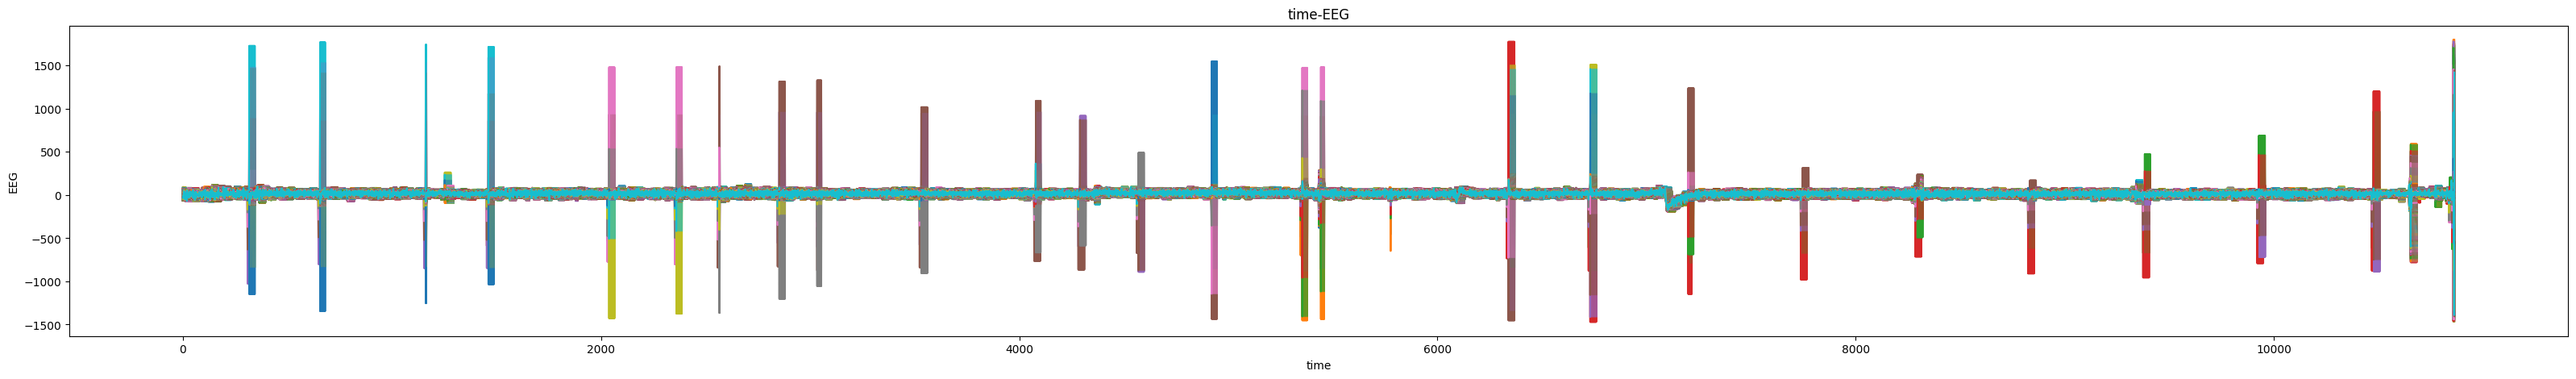

In [ ]:
#filtering 후 time- eeg 그래프 x축 time 맞다
#filtering 전은 EEG_01에 있음

x = np.linspace(0,10864,10864)
b = eeg_selected

plt.figure(figsize = (40,5))
plt.plot(x,b)
plt.xlabel('time')
plt.ylabel('EEG')
plt.title('time-EEG')
plt.ticklabel_format(style='plain')

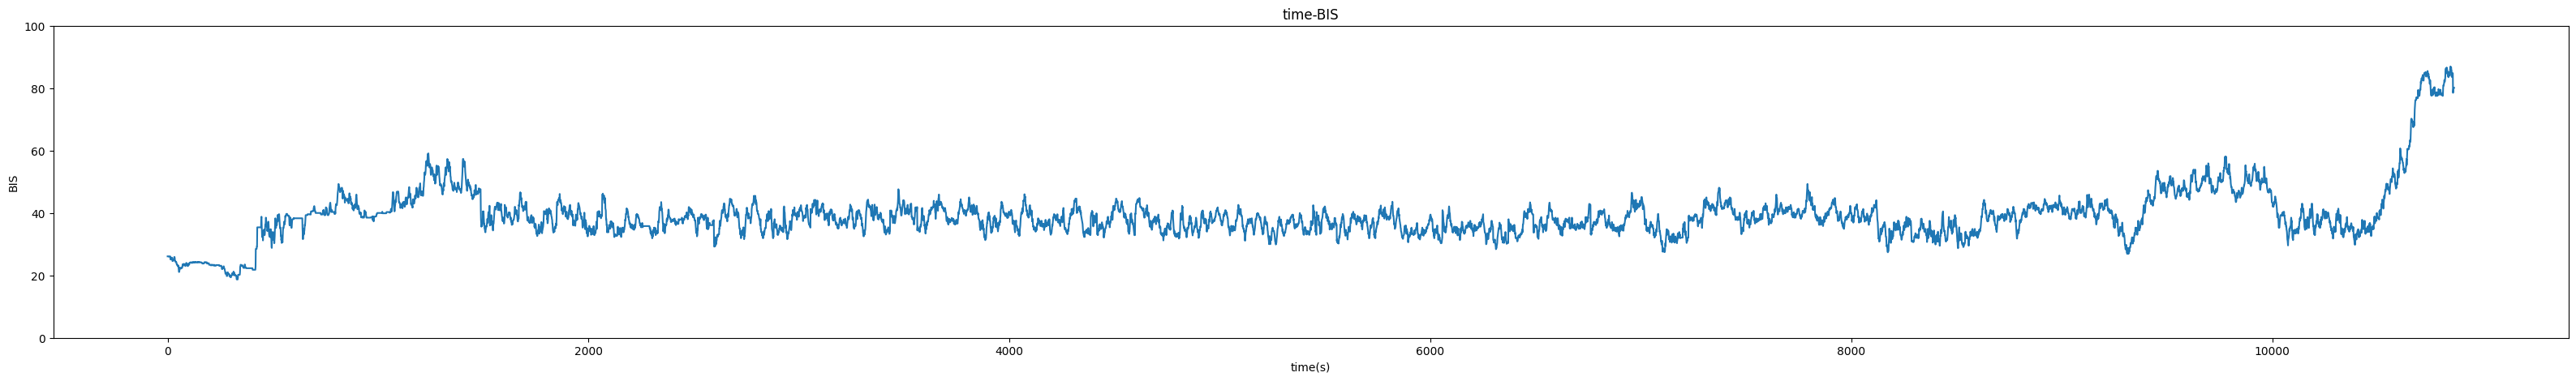

In [ ]:
#filtering 후 time- bis 그래프

x = np.linspace(0,10864,10864)
b = bis_label

plt.figure(figsize = (40,5))
plt.plot(x,b)
plt.xlabel('time(s)')
plt.ylabel('BIS')
plt.ylim(0, 100)
plt.title('time-BIS')
plt.ticklabel_format(style='plain')

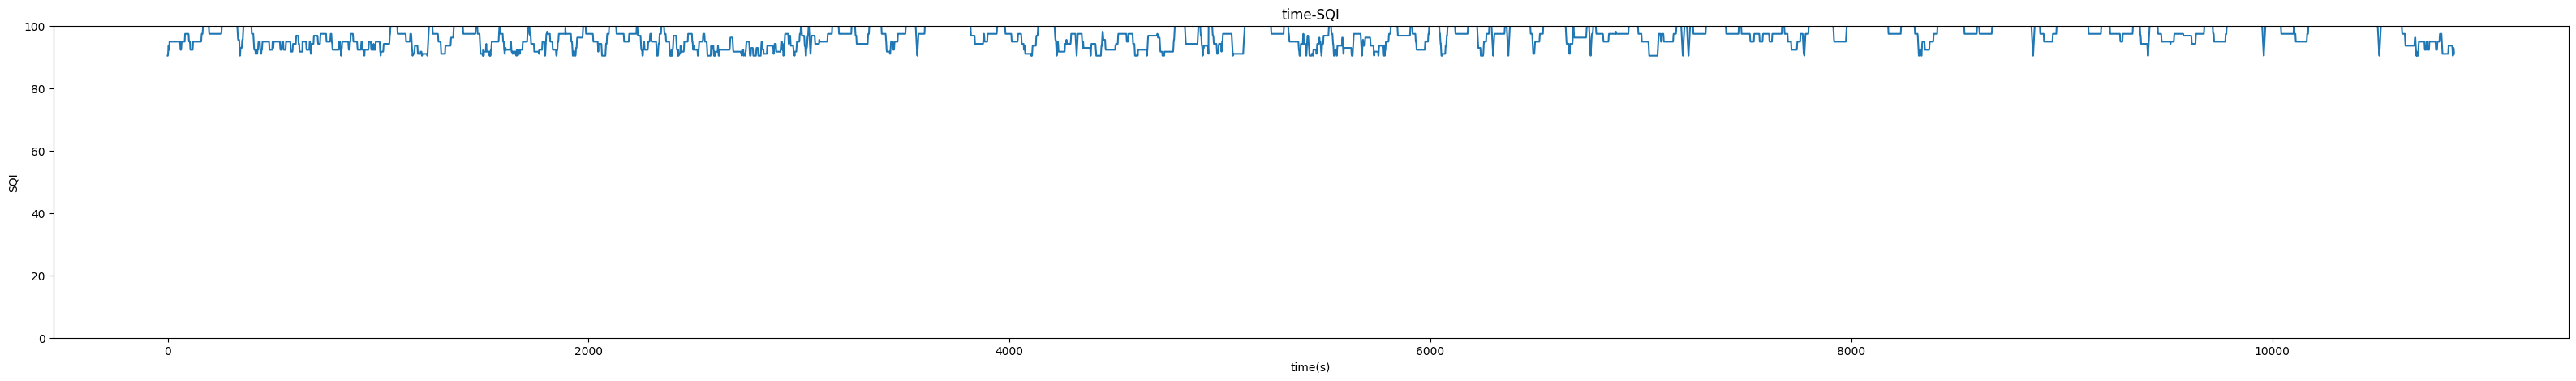

In [ ]:
#time- sqi그래프

x = np.linspace(0,10864,10864)
b = sqi_label

plt.figure(figsize = (40,5))
plt.plot(x,b)
plt.xlabel('time(s)')
plt.ylabel('SQI')
plt.ylim(0, 100)
plt.title('time-SQI')
plt.ticklabel_format(style='plain')

#영역 채우기: plt.fill()

In [ ]:
#모든 raw data에 대해 전처리하기
#함수만들기?
#train, target

In [ ]:
#전처리하는 함수 만들기

# 전처리 자동화

In [ ]:
import os

path = f'{proj_path}/data/raw'
file_list = os.listdir(path)
print(file_list)

for file in file_list:
    filepath = path + '/' + file
    print(filepath)

NameError: ignored

In [ ]:
#전처리 과정 담은 함수

def preprocessing(filename):
  # 전처리 과정 다 넣어두기
  # return: 전처리 된 결과물을 파일로 return (control에서 하기)

  filename = np.load(filepath)

  bis=filename[:,0]
  bis_cond = ~np.isnan(bis)
  idx_arr = np.arange(0, len(bis), 1)
  bis_idx = idx_arr[bis_cond]

  sqi = filename[:,1]
  sqi_cond = ~np.isnan(sqi)
  idx_arr_s = np.arange(0, len(sqi), 1)
  sqi_idx = idx_arr_s[sqi_cond]

  eeg = filename[:, 2]
  start = 55*100
  eeg_start_idx = bis_idx - start
  eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

  eeg_segments = []
  bis_label = []
  sqi_label = []

  for start_idx in tqdm(eeg_start_idx):
    end_idx = start_idx + 30 * 100
    eeg_segments += list([eeg[start_idx:end_idx]])
    bis_label += list([bis[start_idx]])
    sqi_label += list([sqi[start_idx]])

  eeg_segments = np.array(eeg_segments)
  bis_label = np.array(bis_label)
  sqi_label = np.array(sqi_label)

  sqi_cond2 = sqi_label > 90

  bis_label = bis_label[sqi_cond2]
  sqi_label = sqi_label[sqi_cond2]
  eeg_selected = eeg_segments[sqi_cond2]

  inputs = eeg_selected
  outputs = bis_label

  return inputs, outputs
  # 튜플


In [ ]:
#전처리 총괄하는 함수

def control():

  path = f'{proj_path}/data/raw'
  input_path =  f'{proj_path}/data/preprocessed/inputs'
  output_path = f'{proj_path}/data/preprocessed/outputs'
  file_list = os.listdir(path)
  print(file_list)

  for file in file_list:
    filepath = path + '/' + file
    print(filepath)
    preprocessing(filepath)
    # preprocessed = preprocessing(filepath)

    inputs, outputs = preprocessing(filepath)

    np.save(input_path + "/" + file + "_input.npy", inputs)
    np.save(output_path + "/" + file + "_output.npy", outputs)

In [ ]:
# inputs, outputs = preprocessing(filepath)

100%|██████████| 4985/4985 [00:00<00:00, 532676.18it/s]


In [ ]:
# file_list

In [ ]:
# input_path =  "/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/preprocessed/inputs"
# np.save(input_path + "/" + file + "_input.npy", inputs)

In [ ]:
# inputs = np.load(input_path + "/" + file + "_input.npy")
# inputs.shape

(3217, 3000)

In [ ]:
control()

['75.npy', '71.npy', '41.npy', '60.npy', '55.npy', '34.npy', '64.npy', '53.npy', '33.npy', '29.npy', '2.npy', '95.npy', '59.npy', '45.npy', '46.npy', '69.npy', '63.npy', '15.npy', '7.npy', '68.npy', '10.npy', '61.npy', '39.npy', '50.npy', '73.npy', '9.npy', '40.npy', '81.npy', '26.npy', '31.npy', '70.npy', '72.npy', '27.npy', '94.npy', '49.npy', '91.npy', '62.npy', '4.npy', '57.npy', '82.npy', '54.npy', '90.npy', '66.npy', '85.npy', '16.npy', '14.npy', '78.npy', '97.npy', '13.npy', '38.npy', '52.npy', '56.npy', '5.npy', '24.npy', '19.npy', '37.npy', '8.npy', '48.npy', '11.npy', '20.npy', '25.npy', '28.npy', '98.npy', '30.npy', '23.npy', '35.npy', '89.npy', '18.npy', '3.npy', '84.npy', '87.npy', '21.npy', '44.npy', '12.npy', '17.npy', '58.npy', '80.npy', '96.npy', '88.npy', '67.npy', '0.npy', '36.npy', '86.npy', '1.npy', '76.npy', '51.npy', '42.npy', '83.npy', '6.npy', '93.npy', '77.npy', '22.npy', '74.npy', '47.npy', '65.npy', '43.npy', '32.npy', '99.npy', '79.npy', '92.npy']
/content/

100%|██████████| 4985/4985 [00:00<00:00, 363324.62it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/71.npy


100%|██████████| 4985/4985 [00:00<00:00, 425967.31it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/41.npy


100%|██████████| 4985/4985 [00:00<00:00, 312820.44it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/60.npy


100%|██████████| 4985/4985 [00:00<00:00, 275591.89it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/55.npy


100%|██████████| 4985/4985 [00:00<00:00, 290809.28it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/34.npy


100%|██████████| 4985/4985 [00:00<00:00, 236691.37it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/64.npy


100%|██████████| 4985/4985 [00:00<00:00, 438749.46it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/53.npy


100%|██████████| 4985/4985 [00:00<00:00, 354804.10it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/33.npy


100%|██████████| 4985/4985 [00:00<00:00, 428253.19it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/29.npy


100%|██████████| 4985/4985 [00:00<00:00, 406300.02it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/2.npy


100%|██████████| 4985/4985 [00:00<00:00, 439025.84it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/95.npy


100%|██████████| 4985/4985 [00:00<00:00, 420180.57it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/59.npy


100%|██████████| 4985/4985 [00:00<00:00, 185960.06it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/45.npy


100%|██████████| 4985/4985 [00:00<00:00, 153687.76it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/46.npy


100%|██████████| 4985/4985 [00:00<00:00, 129696.33it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/69.npy


100%|██████████| 4985/4985 [00:00<00:00, 131633.12it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/63.npy


100%|██████████| 4985/4985 [00:00<00:00, 112526.20it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/15.npy


100%|██████████| 4985/4985 [00:00<00:00, 114807.38it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/7.npy


100%|██████████| 4985/4985 [00:00<00:00, 121721.60it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/68.npy


100%|██████████| 4985/4985 [00:00<00:00, 126260.46it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/10.npy


100%|██████████| 4985/4985 [00:00<00:00, 194525.80it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/61.npy


100%|██████████| 4985/4985 [00:00<00:00, 232972.75it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/39.npy


100%|██████████| 4985/4985 [00:00<00:00, 258702.63it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/50.npy


100%|██████████| 4985/4985 [00:00<00:00, 237551.90it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/73.npy


100%|██████████| 4985/4985 [00:00<00:00, 151913.43it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/9.npy


100%|██████████| 4985/4985 [00:00<00:00, 271653.23it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/40.npy


100%|██████████| 4985/4985 [00:00<00:00, 203482.16it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/81.npy


100%|██████████| 4985/4985 [00:00<00:00, 422934.35it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/26.npy


100%|██████████| 4985/4985 [00:00<00:00, 190419.25it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/31.npy


100%|██████████| 4985/4985 [00:00<00:00, 482509.99it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/70.npy


100%|██████████| 4985/4985 [00:00<00:00, 387684.59it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/72.npy


100%|██████████| 4985/4985 [00:00<00:00, 201487.94it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/27.npy


100%|██████████| 4985/4985 [00:00<00:00, 221632.68it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/94.npy


100%|██████████| 4985/4985 [00:00<00:00, 187059.77it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/49.npy


100%|██████████| 4985/4985 [00:00<00:00, 180122.38it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/91.npy


100%|██████████| 4985/4985 [00:00<00:00, 119193.72it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/62.npy


100%|██████████| 4985/4985 [00:00<00:00, 123370.62it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/4.npy


100%|██████████| 4985/4985 [00:00<00:00, 125398.71it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/57.npy


100%|██████████| 4985/4985 [00:00<00:00, 104020.84it/s]


/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals/data/raw/82.npy


100%|██████████| 4985/4985 [00:00<00:00, 96705.08it/s]

# 전처리 자동화 test


# 쓸모없는애들

In [ ]:
#BIS nan아닌 애들 indexing하는 함수
#class ???




def bis_index():
  bis=데이터넣기[:,0]
  bis_cond = ~np.isnan(bis)
  idx_arr = np.arrage(0, len(bis), 1)
  bis_idx = idx_arr[bis_cond]
  return bis_idx

def sqi_index():
  sqi = 불러온데이터[:,1]
  sqi_cond = ~np.isnan(sqi)
  idx_arr_s = np.arange(0, len(sqi), 1)
  sqi_idx = idx_arr_s[sqi_cond]
  return sqi_idx


def eeg_index():
  eeg = 불러온데이터[:, 2]
  start = 55*100
  eeg_start_idx = bis_idx - start
  eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]
  return eeg_start_idx

In [ ]:
#segments 자르는 함수 정의

from tqdm import tqdm

def seg():
  eeg_segments = []
  bis_label = []
  sqi_label = []

  for start_idx in tqdm(eeg_start_idx):
    end_idx = start_idx + 30 * 100
    eeg_segments += list([eeg[start_idx:end_idx]])
    bis_label += list([bis[start_idx]])
    sqi_label += list([sqi[start_idx]])

  eeg_segments = np.array(eeg_segments)
  bis_label = np.array(bis_label)
  sqi_label = np.array(sqi_label)

In [ ]:
# SQI > 90 filtering 하는 함수

def select():
  sqi_cond2 = sqi_label > 90

  bis_label = bis_label[sqi_cond2]
  sqi_label = sqi_label[sqi_cond2]
  eeg_selected = eeg_segments[sqi_cond2]